# COVID Prediction +ve/-ve

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_excel(r"Covid_Dataset_new.xlsx")
df.head(10)

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
0,1,1,0,0,0,Yes,male,Other,negative
1,0,0,0,0,0,No,male,Other,positive
2,0,0,0,0,0,Yes,female,Other,negative
3,1,0,0,0,0,No,male,Abroad,negative
4,0,0,0,0,0,Yes,male,Other,positive
5,1,1,0,0,0,No,male,Abroad,negative
6,0,0,0,0,0,No,male,Other,negative
7,1,0,0,0,0,No,female,Other,positive
8,1,0,0,0,0,Yes,female,Other,negative
9,0,1,0,0,0,No,male,Abroad,negative


In [3]:
df.shape 
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 0 to 2136
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cough                2137 non-null   int64 
 1   fever                2137 non-null   int64 
 2   sore_throat          2137 non-null   int64 
 3   shortness_of_breath  2137 non-null   int64 
 4   head_ache            2137 non-null   int64 
 5   age_60_and_above     2137 non-null   object
 6   gender               2137 non-null   object
 7   test_indication      2137 non-null   object
 8   corona_result        2137 non-null   object
dtypes: int64(5), object(4)
memory usage: 150.4+ KB


,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
count,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137,2137,2137,2137
unique,NaN,NaN,NaN,NaN,NaN,2,3,3,2
top,NaN,NaN,NaN,NaN,NaN,No,female,Other,positive
freq,NaN,NaN,NaN,NaN,NaN,1159,1064,1290,1105
mean,0.419747,0.273280,0.038372,0.037436,0.058493,NaN,NaN,NaN,NaN
std,0.493633,0.445748,0.192137,0.189871,0.234729,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
age_60_and_above       0
gender                 0
test_indication        0
corona_result          0
dtype: int64

# EDA

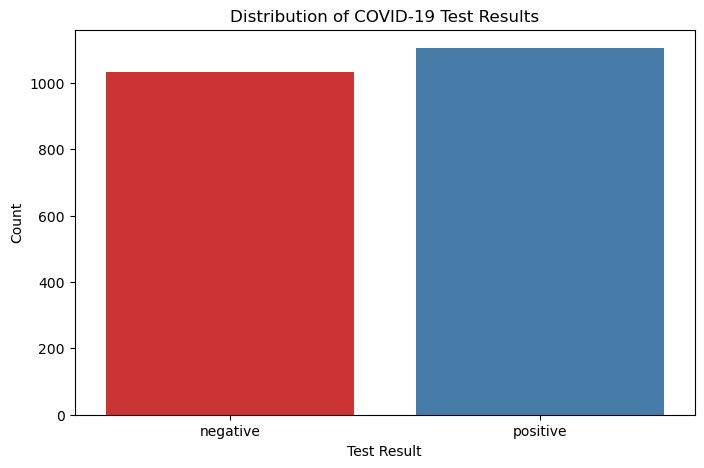

In [5]:
# Count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='corona_result', palette='Set1')
plt.title('Distribution of COVID-19 Test Results')
plt.xlabel('Test Result')
plt.ylabel('Count')
plt.show()

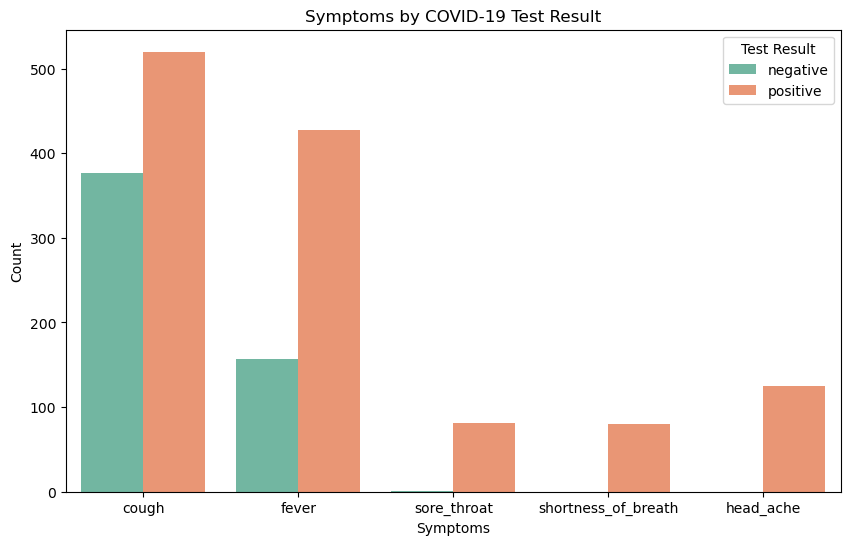

In [6]:
# Melt the DataFrame for easier plotting
df_melted = df.melt(id_vars='corona_result', value_vars=['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache'], 
                    var_name='symptom', value_name='present')

# Filter only the present symptoms
df_melted = df_melted[df_melted['present'] == 1]

# Count plot for symptoms
plt.figure(figsize=(10, 6))
sns.countplot(data=df_melted, x='symptom', hue='corona_result', palette='Set2')
plt.title('Symptoms by COVID-19 Test Result')
plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.legend(title='Test Result')
plt.show()


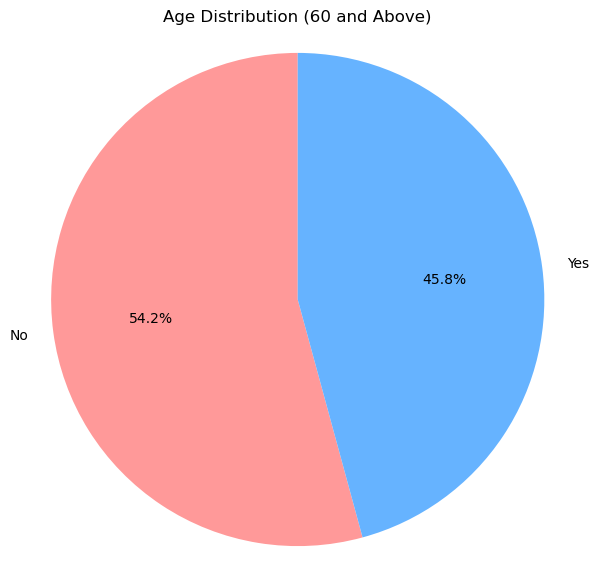

In [7]:
# Pie chart for age 60 and above
age_distribution = df['age_60_and_above'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(age_distribution, labels=age_distribution.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Age Distribution (60 and Above)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle.
plt.show()


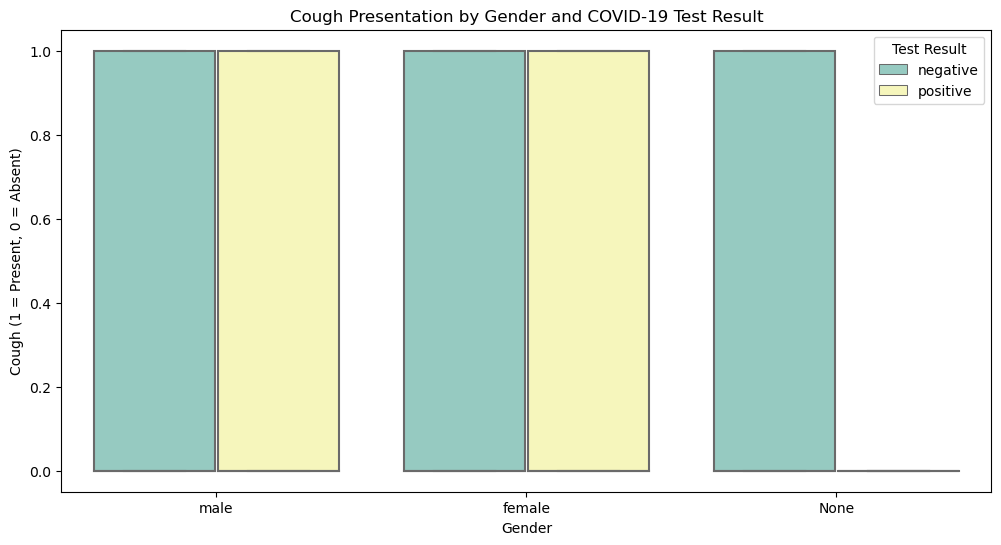

In [8]:
# Box plot for symptom presentation by gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='gender', y='cough', hue='corona_result', palette='Set3')
plt.title('Cough Presentation by Gender and COVID-19 Test Result')
plt.xlabel('Gender')
plt.ylabel('Cough (1 = Present, 0 = Absent)')
plt.legend(title='Test Result')
plt.show()


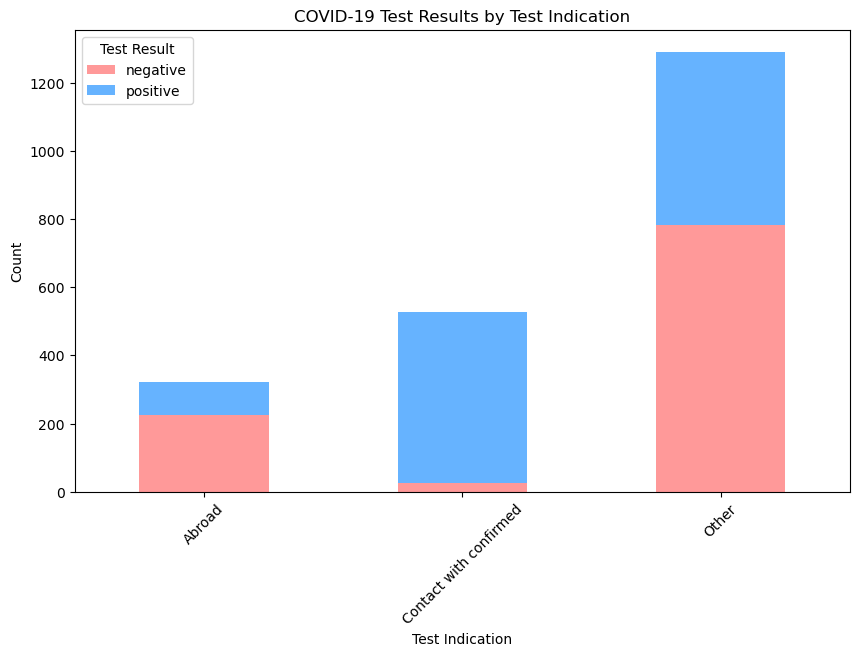

In [9]:
# Count of results by test indication
test_indication_counts = df.groupby(['test_indication', 'corona_result']).size().unstack()

# Stacked bar plot
test_indication_counts.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'], figsize=(10, 6))
plt.title('COVID-19 Test Results by Test Indication')
plt.xlabel('Test Indication')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Test Result')
plt.show()


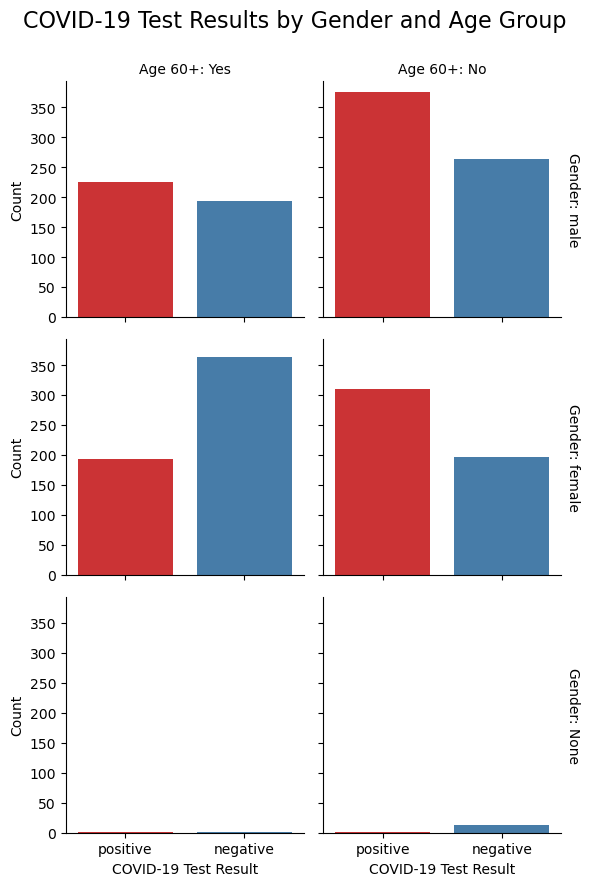

In [10]:
# Create a facet grid for gender and age group
g = sns.FacetGrid(df, col='age_60_and_above', row='gender', margin_titles=True)
g.map(sns.countplot, 'corona_result', order=['positive', 'negative'], palette='Set1')
g.set_axis_labels('COVID-19 Test Result', 'Count')
g.set_titles(col_template='Age 60+: {col_name}', row_template='Gender: {row_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('COVID-19 Test Results by Gender and Age Group', fontsize=16)
plt.show()


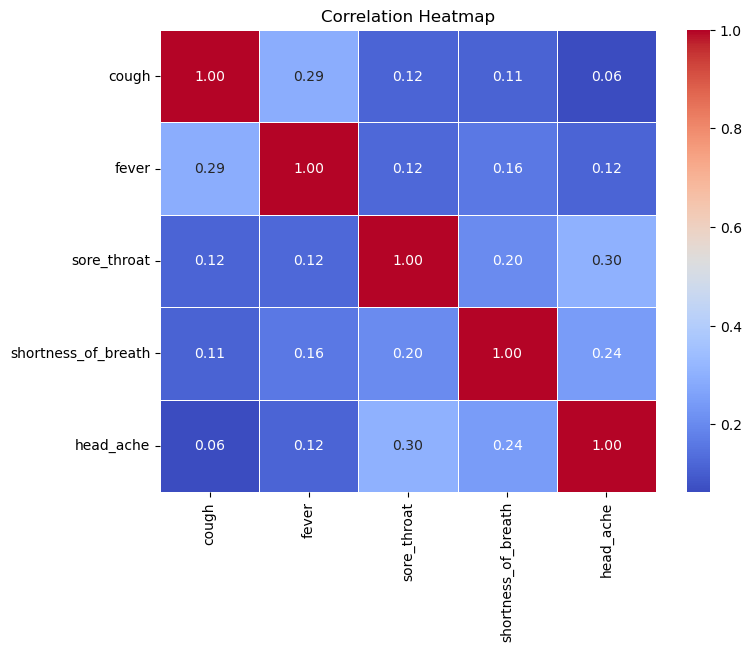

In [11]:

# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables into numerical values
le = LabelEncoder()
df['age_60_and_above'] = le.fit_transform(df['age_60_and_above'])
df['gender'] = le.fit_transform(df['gender'])
df['test_indication'] = le.fit_transform(df['test_indication'])
df['corona_result'] = le.fit_transform(df['corona_result'])



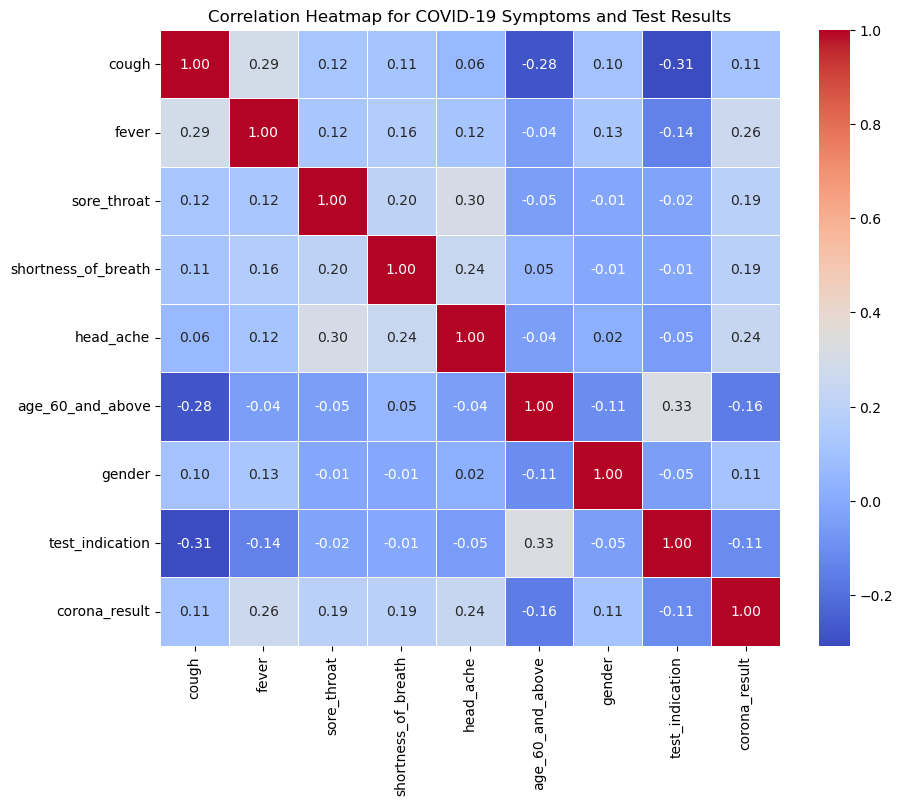

In [13]:
# Create a correlation matrix
corr_matrix = df.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap for COVID-19 Symptoms and Test Results')
plt.show()

# Splitting X and Y

In [14]:
#selecing the independent and dependent variable

X = df.drop('corona_result', axis=1)  # Dropping the target column 'corona_result'
Y = df['corona_result']  # Target column 'corona_result'

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(X)
df = scaler.transform(X)

In [16]:
from sklearn.model_selection import train_test_split 
## split the data into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,
                                                random_state=10)


# Applying all the classification algorithm

In [17]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# List of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN Classifier": KNeighborsClassifier(),
    "SVC": SVC(),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42)
}

# Function to evaluate models
def evaluate_model_performance(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Classification report (precision, recall, f1-score)
    report = classification_report(Y_test, Y_pred)
    print("Classification Report:\n", report)

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}")
    evaluate_model_performance(model, X_train, X_test, Y_train, Y_test)


Evaluating Logistic Regression
Accuracy: 0.6519
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.67      0.64       203
           1       0.68      0.64      0.66       225

    accuracy                           0.65       428
   macro avg       0.65      0.65      0.65       428
weighted avg       0.65      0.65      0.65       428

Evaluating Decision Tree
Accuracy: 0.7687
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.82      0.77       203
           1       0.82      0.72      0.77       225

    accuracy                           0.77       428
   macro avg       0.77      0.77      0.77       428
weighted avg       0.77      0.77      0.77       428

Evaluating Random Forest
Accuracy: 0.7710
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.82      0.77       203
           1       0.82      0.72

# Tuning the algos

In [18]:
from sklearn.model_selection import GridSearchCV

# Sample hyperparameter grids for tuning
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    "Decision Tree": {
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5]
    },
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [10, 15]
    },
    "KNN Classifier": {
        'n_neighbors': [5, 10]
    },
    "SVC": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'learning_rate': [0.1, 0.2]
    }
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN Classifier": KNeighborsClassifier(),
    "SVC": SVC(),
    "XGBoost": XGBClassifier()
}

# Assuming X_train, Y_train, X_test, Y_test are defined
best_models = {}

for name, model in models.items():
    param_grid = param_grids.get(name, {})
    
    # Tune model using GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    
    # Get best model and parameters
    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Evaluate the best model
    Y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    
    print(f"Evaluating {name}:")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(Y_test, Y_pred))

Evaluating Logistic Regression:
Best Parameters: {'C': 1, 'solver': 'saga'}
Accuracy: 0.6519
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.67      0.64       203
           1       0.68      0.64      0.66       225

    accuracy                           0.65       428
   macro avg       0.65      0.65      0.65       428
weighted avg       0.65      0.65      0.65       428

Evaluating Decision Tree:
Best Parameters: {'max_depth': 15, 'min_samples_split': 2}
Accuracy: 0.7687
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.82      0.77       203
           1       0.82      0.72      0.77       225

    accuracy                           0.77       428
   macro avg       0.77      0.77      0.77       428
weighted avg       0.77      0.77      0.77       428

Evaluating Random Forest:
Best Parameters: {'max_depth': 15, 'n_estimators': 100}
Accuracy: 0.7710
Clas

In [19]:
Y.value_counts()

1    1105
0    1032
Name: corona_result, dtype: int64

no need to apply SMOTE

In [20]:
from sklearn.metrics import confusion_matrix

# Train and evaluate the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, Y_train)

# Predict class probabilities for the test set
y_pred_prob = random_forest.predict_proba(X_test)

# Print predicted probabilities for the positive class
print("Predicted probabilities for the positive class:\n", y_pred_prob)

# Iterate over threshold values from 0.4 to 0.6 with a step of 0.01
for threshold in np.arange(0.4, 0.61, 0.01):
    # Classify based on the current threshold
    y_pred_class = np.where(y_pred_prob[:, 1] > threshold, 1, 0)
    
    # Calculate the confusion matrix
    cfm = confusion_matrix(Y_test, y_pred_class)
    
    # Calculate total errors
    total_errors = round(cfm[0, 1] + cfm[1, 0])
    
    # Print errors and confusion matrix details
    print(f"Threshold: {round(threshold, 2)} - Total Errors: {total_errors}, Type 2 Error: {cfm[1, 0]}, Type 1 Error: {cfm[0, 1]}")


Predicted probabilities for the positive class:
 [[5.10374519e-02 9.48962548e-01]
 [7.17588296e-01 2.82411704e-01]
 [4.51692985e-01 5.48307015e-01]
 [5.77498836e-01 4.22501164e-01]
 [4.21783858e-01 5.78216142e-01]
 [0.00000000e+00 1.00000000e+00]
 [7.75838213e-01 2.24161787e-01]
 [6.38631802e-02 9.36136820e-01]
 [3.06246510e-01 6.93753490e-01]
 [8.79053648e-01 1.20946352e-01]
 [4.51692985e-01 5.48307015e-01]
 [0.00000000e+00 1.00000000e+00]
 [4.21783858e-01 5.78216142e-01]
 [8.79053648e-01 1.20946352e-01]
 [8.39981669e-01 1.60018331e-01]
 [7.99749984e-01 2.00250016e-01]
 [8.79053648e-01 1.20946352e-01]
 [5.07215703e-01 4.92784297e-01]
 [3.06246510e-01 6.93753490e-01]
 [8.79053648e-01 1.20946352e-01]
 [4.51692985e-01 5.48307015e-01]
 [1.43129781e-01 8.56870219e-01]
 [8.79053648e-01 1.20946352e-01]
 [0.00000000e+00 1.00000000e+00]
 [3.06246510e-01 6.93753490e-01]
 [8.79053648e-01 1.20946352e-01]
 [7.98732342e-01 2.01267658e-01]
 [2.43243243e-03 9.97567568e-01]
 [5.07215703e-01 4.92784297

# 0.43 is the optimum threshold

In [21]:
# Predict class probabilities for the test set
y_pred_prob = random_forest.predict_proba(X_test)

# Print predicted probabilities for the positive class
print(y_pred_prob)

# Adjusted threshold
threshold = 0.4

# Classify based on the threshold
y_pred_class = (y_pred_prob[:, 1] > threshold).astype(int)

# Print the predicted classes
print(y_pred_class)


[[5.10374519e-02 9.48962548e-01]
 [7.17588296e-01 2.82411704e-01]
 [4.51692985e-01 5.48307015e-01]
 [5.77498836e-01 4.22501164e-01]
 [4.21783858e-01 5.78216142e-01]
 [0.00000000e+00 1.00000000e+00]
 [7.75838213e-01 2.24161787e-01]
 [6.38631802e-02 9.36136820e-01]
 [3.06246510e-01 6.93753490e-01]
 [8.79053648e-01 1.20946352e-01]
 [4.51692985e-01 5.48307015e-01]
 [0.00000000e+00 1.00000000e+00]
 [4.21783858e-01 5.78216142e-01]
 [8.79053648e-01 1.20946352e-01]
 [8.39981669e-01 1.60018331e-01]
 [7.99749984e-01 2.00250016e-01]
 [8.79053648e-01 1.20946352e-01]
 [5.07215703e-01 4.92784297e-01]
 [3.06246510e-01 6.93753490e-01]
 [8.79053648e-01 1.20946352e-01]
 [4.51692985e-01 5.48307015e-01]
 [1.43129781e-01 8.56870219e-01]
 [8.79053648e-01 1.20946352e-01]
 [0.00000000e+00 1.00000000e+00]
 [3.06246510e-01 6.93753490e-01]
 [8.79053648e-01 1.20946352e-01]
 [7.98732342e-01 2.01267658e-01]
 [2.43243243e-03 9.97567568e-01]
 [5.07215703e-01 4.92784297e-01]
 [5.07215703e-01 4.92784297e-01]
 [5.072157

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)

acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)

print(classification_report(Y_test, y_pred_class))

[[156  47]
 [ 44 181]]
Accuracy of the model:  0.7873831775700935
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       203
           1       0.79      0.80      0.80       225

    accuracy                           0.79       428
   macro avg       0.79      0.79      0.79       428
weighted avg       0.79      0.79      0.79       428



# AUC and ROC curve

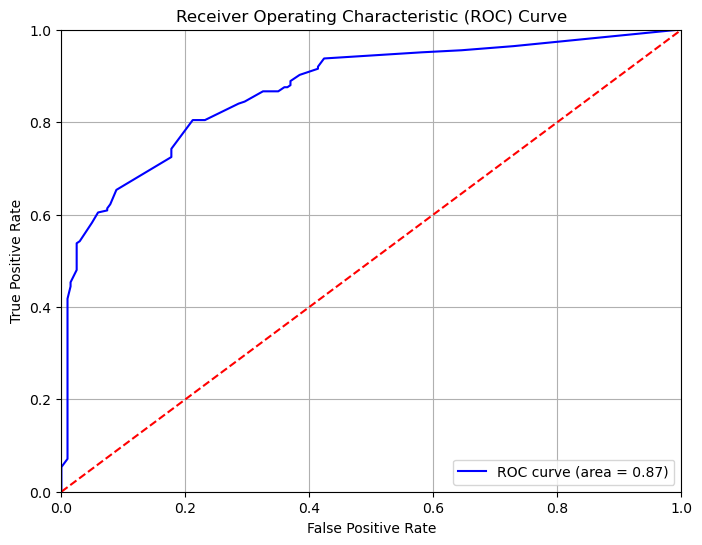

In [23]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Train the XGBoost classifier (if not already done)
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, Y_train)

# Predict class probabilities for the test set
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# PREDICTIONS

In [26]:
# Predict class labels for the test set
y_pred = random_forest.predict(X_test)

# Print the predicted labels
print("Predicted Labels:\n", y_pred)


Predicted Labels:
 [1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0
 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0
 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1
 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0
 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1
 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1
 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1]


In [28]:
# Predict class probabilities for the test set
y_pred_prob = random_forest.predict_proba(X_test)

# Print the predicted probabilities for both classes
print("Predicted Probabilities:\n", y_pred_prob)

Predicted Probabilities:
 [[5.10374519e-02 9.48962548e-01]
 [7.17588296e-01 2.82411704e-01]
 [4.51692985e-01 5.48307015e-01]
 [5.77498836e-01 4.22501164e-01]
 [4.21783858e-01 5.78216142e-01]
 [0.00000000e+00 1.00000000e+00]
 [7.75838213e-01 2.24161787e-01]
 [6.38631802e-02 9.36136820e-01]
 [3.06246510e-01 6.93753490e-01]
 [8.79053648e-01 1.20946352e-01]
 [4.51692985e-01 5.48307015e-01]
 [0.00000000e+00 1.00000000e+00]
 [4.21783858e-01 5.78216142e-01]
 [8.79053648e-01 1.20946352e-01]
 [8.39981669e-01 1.60018331e-01]
 [7.99749984e-01 2.00250016e-01]
 [8.79053648e-01 1.20946352e-01]
 [5.07215703e-01 4.92784297e-01]
 [3.06246510e-01 6.93753490e-01]
 [8.79053648e-01 1.20946352e-01]
 [4.51692985e-01 5.48307015e-01]
 [1.43129781e-01 8.56870219e-01]
 [8.79053648e-01 1.20946352e-01]
 [0.00000000e+00 1.00000000e+00]
 [3.06246510e-01 6.93753490e-01]
 [8.79053648e-01 1.20946352e-01]
 [7.98732342e-01 2.01267658e-01]
 [2.43243243e-03 9.97567568e-01]
 [5.07215703e-01 4.92784297e-01]
 [5.07215703e-01 

In [29]:
# Create a DataFrame to store predictions and actual values
predictions_df = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': y_pred
})

# Convert DataFrame to Excel
predictions_df.to_excel('predictions.xlsx', index=False)

print("Predictions have been saved to 'predictions.xlsx'")

Predictions have been saved to 'predictions.xlsx'


# PROJECT ENDS HERE